In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import joblib
import random


In [2]:
# Iris
# iris Features: [Sepal Length, Sepal Width, Petal Length, Petal Width]
# iris target: {Setosa, Versicolour, Virginica}
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


50 98 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


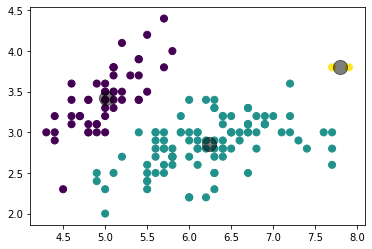

In [3]:
import math
from copy import deepcopy
from enum import Enum

class Agglo:
    class Linkage(Enum):
        Single = 1
        Complete = 2
        Average = 3
        AverageGroup = 4
    
    n_clusters = 1
    linkage = Linkage.Single
    dist_thresh = 1
    list_of_cluster = []
    
    def __init__(self, n_clusters=1, linkage=Linkage.Single, dist_thresh=1):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.dist_thresh = dist_thresh
        
    
    def euclideanDist(self, x1, x2):
        total = 0
        for a, b in zip(x1, x2):
            total += (a-b) ** 2
        return math.sqrt(total)
    
    def computeClusterDist(self, cluster1, cluster2):
        distance = 0.0
        if self.linkage == Agglo.Linkage.Single:
            min_dist = 0
            min_dist_bool = False
            for c1 in cluster1:
                for c2 in cluster2:
                    dist = self.euclideanDist(self._X[c1], self._X[c2])
                    if (not min_dist_bool):
                        min_dist = dist
                        min_dist_bool = True
                    elif (dist < min_dist):
                        min_dist = dist
            distance = min_dist
            
        elif self.linkage == Agglo.Linkage.Complete:
            max_dist = 0
            max_dist_bool = False
            for c1 in cluster1:
                for c2 in cluster2:
                    dist = self.euclideanDist(self._X[c1], self._X[c2])
                    if (not max_dist_bool):
                        max_dist = dist
                        max_dist_bool = True
                    elif (dist > max_dist):
                        max_dist = dist
            distance = max_dist
            
        elif self.linkage == Agglo.Linkage.Average:
            avg_dist = 0.0
            for c1 in cluster1:
                for c2 in cluster2:
                    avg_dist += self.euclideanDist(self._X[c1], self._X[c2])
            avg_dist /= (len(cluster1) * len(cluster2))
                    
            distance = avg_dist
                
        else: #linkage == Agglo.Linkage.AverageGroup:
            centroid1 = np.average(self._X[cluster1], axis=0)
            centroid2 = np.average(self._X[cluster2], axis=0)
            distance = self.euclideanDist(centroid1, centroid2)
        return distance
    
    def mergeCluster(self, clusters, c1_idx, c2_idx):
        newCluster = deepcopy(clusters)
        newCluster[c1_idx] += newCluster.pop(c2_idx)
        return newCluster
    
    def getClusters(self):
        return self.clusters
    
    def getIndexLabel(self, idx):
        for cIter in range(len(self.clusters)):
            if idx in self.clusters[cIter]:
                return cIter
        return -1

    def getLabels(self):
        return self.labels
    
    def visualize(self):
        plt.scatter(self._X[:, 0], self._X[:, 1], c= self.labels, s=50, cmap='viridis')

        centers = np.asarray([np.average(self._X[c], axis=0) for c in self.clusters])
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    
    def fit(self, X):
        self._X = X
        self.list_of_cluster = []
        
        dataset_len = np.size(self._X, axis=0)
        
        # initial n clusters
        clusters = [[i] for i in range(dataset_len)]
        self.list_of_cluster.append(deepcopy(clusters))
        
        while (len(clusters) > 1):
            # compute distance matrix
            is_thresh_passed = True
            min_dist = 0
            min_dist_bool = False
            min_c1_iter, min_c2_iter = -1, -1

            dist_mat = [[0 for j in range(len(clusters))] for i in range(len(clusters))]
            for c1_iter in range(len(clusters)):
                for c2_iter in range(c1_iter+1, len(clusters)):
                    dist_mat[c1_iter][c2_iter] = self.computeClusterDist(clusters[c1_iter], clusters[c2_iter])
                    if (not min_dist_bool):
                        min_dist = dist_mat[c1_iter][c2_iter]
                        min_c1_iter, min_c2_iter = c1_iter, c2_iter
                        min_dist_bool = True
                    elif (dist_mat[c1_iter][c2_iter] < min_dist):
                        min_dist = dist_mat[c1_iter][c2_iter]
                        min_c1_iter, min_c2_iter = c1_iter, c2_iter

            # merge clusters
            clusters = self.mergeCluster(clusters, min_c1_iter, min_c2_iter)
            self.list_of_cluster.append(deepcopy(clusters))
            
        self.clusters = deepcopy(self.list_of_cluster[self.n_clusters * -1])
        
        # assign labels
        X_len = np.size(self._X, axis=0)
        labels = []

        for i in range(X_len):
            labels.append(self.getIndexLabel(i))
        self.labels = labels
        
        return self
        

agglo = Agglo(3)
clusterer = agglo.fit(iris_X)

print(len(clusterer.getClusters()[0]), len(clusterer.getClusters()[1]), len(clusterer.getClusters()[2]))
print(clusterer.getLabels())

clusterer.visualize()


In [4]:
from sklearn import metrics
from math import factorial
#Fowkles-Mallows
clusters = clusterer.getClusters()
labels = clusterer.getLabels()
def nCr(n, r): 
    return(factorial(n) / (factorial(r)* factorial(n - r))) 

def FMI(labels_true, clusters):
    N = len(labels_true)
    total_pairs = (N*(N-1))/2
    #count positives
    count_positives_comb = 0
    for i in clusters:
        count_positives_comb += (nCr(len(i),2)) 
    #count TP
    count_attributes_in_class = []
    k = 0
    for i in clusters: #each clusters
        count_attributes_in_class.append([])
        #foreach labels, check is it the same class or not
        for l in set(labels_true):
            count_same_class = 0
            for attributes in i:
                if(labels_true[attributes]==l):
                    count_same_class += 1
            count_attributes_in_class[k].append(count_same_class)
        k+=1
    count_TP = 0
    for i in count_attributes_in_class:
        for j in i:
            if(j>1):
                count_TP += (nCr(j,2)) 
    #count FP
    count_FP = count_positives_comb - count_TP

    #count negatives
    count_negatives_comb = total_pairs - count_positives_comb

    #count FN
    count_FN = 0
    for clusters in count_attributes_in_class:
        for j in range (0,len(clusters)-1):    
            miss_attributes = 0
            for k in range(j+1,len(clusters)):
                miss_attributes += clusters[k]
            count_FN += clusters[j] * miss_attributes
    return count_TP**2 / ((count_TP + count_FP)*(count_TP + count_FN))

print(FMI(iris.target,clusters))
print(metrics.fowlkes_mallows_score(iris.target, labels))



0.3583160731400846
0.7635170681000877


In [5]:
# Silhouette Coefficient for a set of samples 
def silhouette_coefficient(X, labels, metric='euclidean', sample_size=None,
                     random_state=None, **kwds):
    if sample_size is not None:
        X, labels = check_X_y(X, labels, accept_sparse=['csc', 'csr'])
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        if metric == "precomputed":
            X, labels = X[indices].T[indices].T, labels[indices]
        else:
            X, labels = X[indices], labels[indices]
    # return the mean of the Silhouette Coefficient for each sample
    return np.mean(metrics.silhouette_samples(X, labels, metric=metric, **kwds))

def silhouette_samples(X, labels, metric='euclidean', **kwds):
    X, labels = check_X_y(X, labels, accept_sparse=['csc', 'csr'])

    # Check for non-zero diagonal entries in precomputed distance matrix
    if metric == 'precomputed':
        atol = np.finfo(X.dtype).eps * 100
        if np.any(np.abs(np.diagonal(X)) > atol):
            raise ValueError(
                'The precomputed distance matrix contains non-zero '
                'elements on the diagonal. Use np.fill_diagonal(X, 0).'
            )

    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples = len(labels)
    label_freqs = np.bincount(labels)
    metrics.check_number_of_labels(len(le.classes_), n_samples)

    kwds['metric'] = metric
    reduce_func = functools.partial(_silhouette_reduce,
                                    labels=labels, label_freqs=label_freqs)
    results = zip(*pairwise_distances_chunked(X, reduce_func=reduce_func,
                                              **kwds))
    intra_clust_dists, inter_clust_dists = results
    intra_clust_dists = np.concatenate(intra_clust_dists)
    inter_clust_dists = np.concatenate(inter_clust_dists)

    denom = (label_freqs - 1).take(labels, mode='clip')
    with np.errstate(divide="ignore", invalid="ignore"):
        intra_clust_dists /= denom

    sil_samples = inter_clust_dists - intra_clust_dists
    with np.errstate(divide="ignore", invalid="ignore"):
        sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)
    # nan values are for clusters of size 1, and should be 0
    return np.nan_to_num(sil_samples)


In [6]:
# Silhouette Coefficient
print(silhouette_coefficient(iris_X, labels, metric='euclidean'))
print(metrics.silhouette_score(iris_X, labels, metric='euclidean'))



0.5121107753649304
0.5121107753649304
